In [1]:
# 使用Python 內建模組datetime 建立時間
from datetime import datetime
print(datetime(year=2021, month=7, day=4))

# 使用第三方dateutil 模組 可以從字串中剖析出日期
from dateutil import parser
date = parser.parse("4th of July, 2021")
print(date)

# 使用strftime() 輸出格式化字串
print(date.strftime('%A'))

2021-07-04 00:00:00
2021-07-04 00:00:00
Sunday


In [2]:
import numpy as np
# 使用NumPy 的時間資料型態
date = np.array('2021-07-04', dtype=np.datetime64)
print(date)

# 可進行向量化運算
print(date + np.arange(12))

2021-07-04
['2021-07-04' '2021-07-05' '2021-07-06' '2021-07-07' '2021-07-08'
 '2021-07-09' '2021-07-10' '2021-07-11' '2021-07-12' '2021-07-13'
 '2021-07-14' '2021-07-15']


In [3]:
# 以分為單位
print(np.datetime64('2021-07-04 12:00'))

# 強制設定單位為奈秒
print(np.datetime64('2021-07-04 12:59:59.50', 'ns'))

2021-07-04T12:00
2021-07-04T12:59:59.500000000


In [3]:
import pandas as pd
# pandas 字串轉時間物件
date = pd.to_datetime("4th of July, 2021")
print(date)
# 輸出格式時間編碼
print(date.strftime('%A'))
# 進行向量化操作
print(date + pd.to_timedelta(np.arange(12),'D'))

2021-07-04 00:00:00
Sunday
DatetimeIndex(['2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
               '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
               '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15'],
              dtype='datetime64[ns]', freq=None)


In [5]:
# 使用時間戳記當作索引的Series物件
index = pd.DatetimeIndex(['2020-07-04', '2020-08-04',
                          '2021-07-04','2021-08-04'])
data = pd.Series([0, 1, 2, 3], index = index)
print(data)

# 之後可以以時間當作索引切片
print(data['2020-07-04':'2021-07-04'])

# 甚至可以傳遞部分的時間 如指定年
print(data['2021'])

2020-07-04    0
2020-08-04    1
2021-07-04    2
2021-08-04    3
dtype: int64
2020-07-04    0
2020-08-04    1
2021-07-04    2
dtype: int64
2021-07-04    2
2021-08-04    3
dtype: int64


In [6]:
# 使用pd.to_date_time傳不同格式字串
dates = pd.to_datetime([datetime(2021, 7, 3), '4th of July, 2021',
                        '2021-Jul-6', '07-07-2021', '20210708'])
print(dates)

# 使用to_period() 加上頻率單位 轉成 PeriodIndex
print(dates.to_period('D'))

# 日期減日期會變成TimedeltaIndex
dates - dates[0]

DatetimeIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
               '2021-07-08'],
              dtype='datetime64[ns]', freq=None)
PeriodIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
             '2021-07-08'],
            dtype='period[D]')


TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [7]:
# date_range() 可指定起始日期 頻率編碼
print(pd.date_range('2015-07-03', '2015-07-10'))
print(pd.date_range('2015-07-03', periods = 8))
print(pd.date_range('2015-07-03', periods=8, freq='h'))


DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='h')


In [8]:
# 使用period_range()
print(pd.period_range('2015-07', periods=8, freq='M'))

# 使用timedelta_range()
print(pd.timedelta_range(0, periods=6, freq='h'))

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')
TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00'],
               dtype='timedelta64[ns]', freq='h')


In [9]:
# 以小時和分作為頻率
print(pd.timedelta_range(0, periods=6, freq="2h30min"))

# 表格內的編碼 需要引入pd.tseries.offsets
from pandas.tseries.offsets import BDay
print(pd.date_range('2015-07-01', periods=6, freq=BDay()))

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00'],
               dtype='timedelta64[ns]', freq='150min')
DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07', '2015-07-08'],
              dtype='datetime64[ns]', freq='B')


In [44]:
# 載入部分S&P 500 歷史價格資訊
import yfinance as yf

sp500 = yf.download('^GSPC', start='2018-01-01', end='2022-12-31')

print(sp500.head())

[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2018-01-02  2695.810059  2695.889893  2682.360107  2683.729980  3397430000
2018-01-03  2713.060059  2714.370117  2697.770020  2697.850098  3544030000
2018-01-04  2723.989990  2729.290039  2719.070068  2719.310059  3697340000
2018-01-05  2743.149902  2743.449951  2727.919922  2731.330078  3239280000
2018-01-08  2747.709961  2748.510010  2737.600098  2742.669922  3246160000


<Axes: xlabel='Date'>

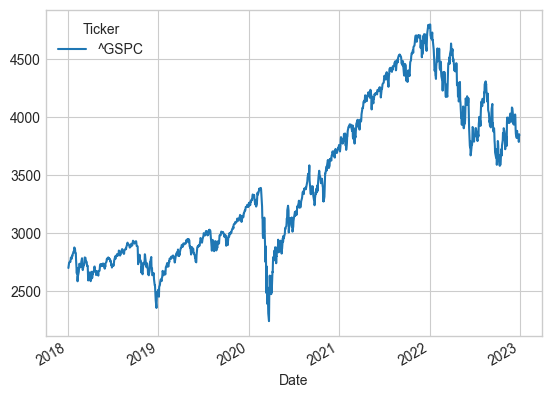

In [45]:
# 以收盤價為範例
sp500 = sp500['Close']

# 視覺化
#matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
sp500.plot()

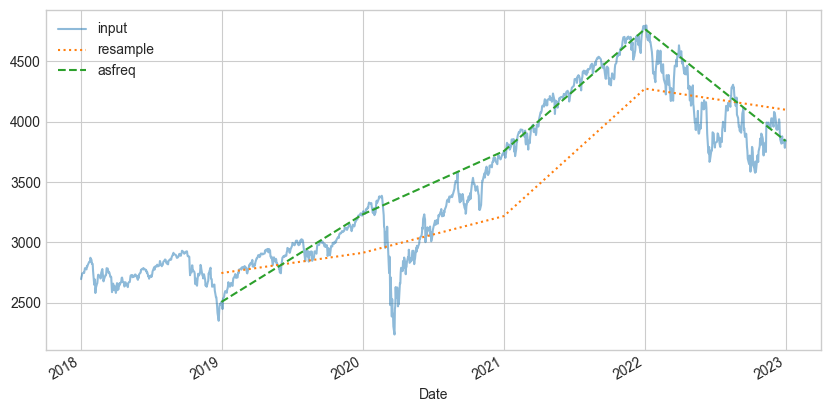

In [24]:
# 比較兩個函數的差異
fig, ax = plt.subplots(figsize=(10, 5))
sp500.plot(alpha=0.5, style='-',ax=ax)
sp500.resample('BYE').mean().plot(style=":",ax=ax)
sp500.asfreq('BYE').plot(style="--",ax=ax)
plt.legend(['input', 'resample', 'asfreq'], loc='upper left')

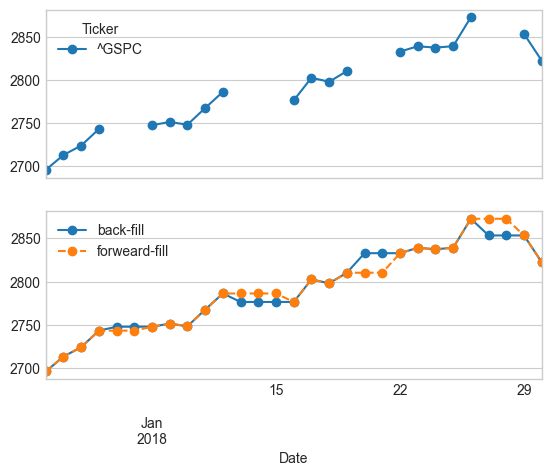

In [ ]:
# S&P 假日沒有資料
fig, ax = plt.subplots(2, sharex=True)
data = sp500.iloc[:20]
data.asfreq('D').plot(ax=ax[0], marker='o')
# 比較向前補值與向後補植的差異
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forweard-fill"])

Text(0, 0.5, '% Return on Investment fter 1 year')

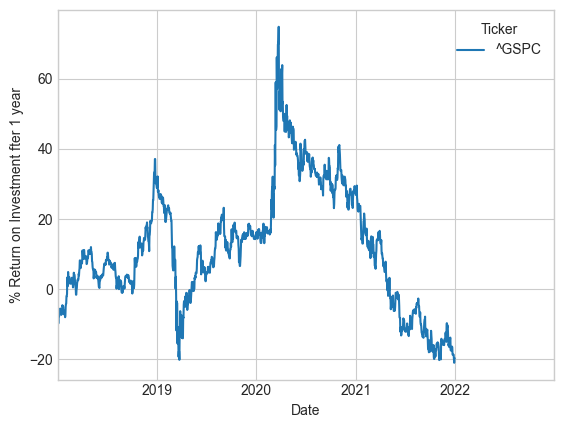

In [37]:
# 位移一年 算回報率 ROI
sp500 = sp500.asfreq('D', method='pad')
ROI = 100 * (sp500.shift(-365) - sp500) / sp500
ROI.plot()
plt.ylabel('% Return on Investment fter 1 year')

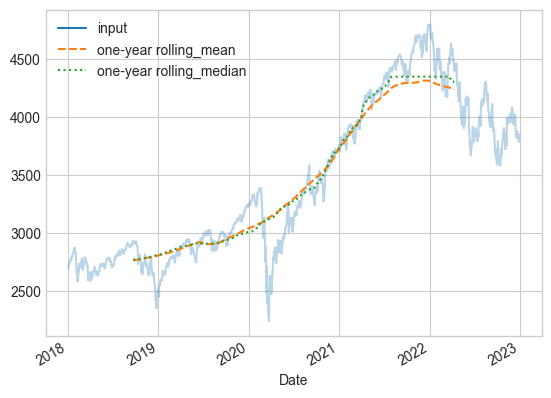

In [57]:
# 一年為單位的股價滾動平均數和標準差
rolling = sp500.rolling(365, center=True)

data = pd.DataFrame({'input': sp500.stack().droplevel('Ticker'),
                     'one-year rolling_mean': rolling.mean().stack().droplevel('Ticker'),
                     'one-year rolling_median': rolling.median().stack().droplevel('Ticker')})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

In [56]:
sp500.stack().droplevel('Ticker')

Date
2018-01-02    2695.810059
2018-01-03    2713.060059
2018-01-04    2723.989990
2018-01-05    2743.149902
2018-01-08    2747.709961
                 ...     
2022-12-23    3844.820068
2022-12-27    3829.250000
2022-12-28    3783.219971
2022-12-29    3849.280029
2022-12-30    3839.500000
Length: 1259, dtype: float64

In [ ]:
# 匯入資料 指定時間為索引 自動剖析
data = pd.read_csv('./data/FremontBridge.csv', index_col='Date', parse_dates=True)

# 簡化欄位名稱
data.columns = ['Total', 'East', 'West']

# 查看統計摘要
print(data.dropna().describe())

C:\Users\coffi\AppData\Local\Temp\ipykernel_1984\4014516775.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('./data/FremontBridge.csv', index_col='Date', parse_dates=True)


               Total           East           West
count  107324.000000  107324.000000  107324.000000
mean      106.039469      45.370243      60.669226
std       131.573781      59.192145      81.992783
min         0.000000       0.000000       0.000000
25%        13.000000       5.000000       7.000000
50%        60.000000      26.000000      32.000000
75%       145.000000      62.000000      80.000000
max      1097.000000     667.000000     850.000000


Text(0, 0.5, 'Hourly Bicycle Count')

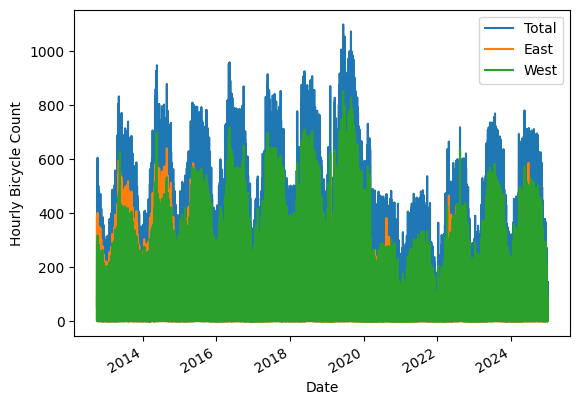

In [7]:
import matplotlib.pyplot as plt
# 視覺化圖形
data.plot()
plt.ylabel('Hourly Bicycle Count')

Text(0, 0.5, 'Weekly bicycle count')

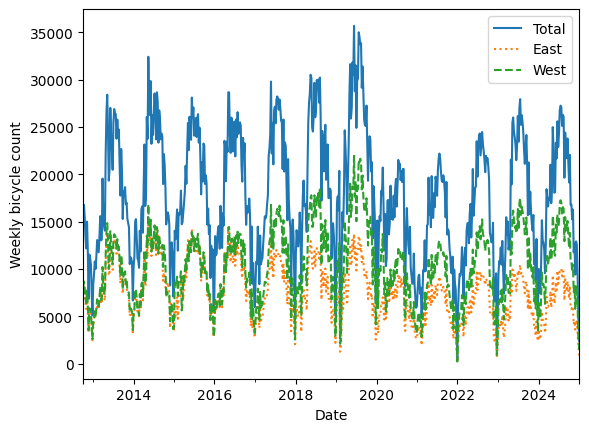

In [8]:
# 重新取樣
weekly = data.resample('W').sum()
weekly.plot(style=['-', ':', '--'])
plt.ylabel('Weekly bicycle count')

Text(0, 0.5, 'mean hourly count')

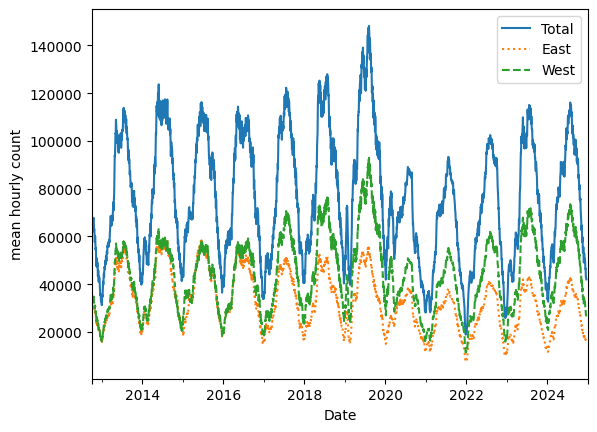

In [9]:
# 改用30天的滾動平均數
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=['-', ':', '--'])
plt.ylabel('mean hourly count')

<Axes: xlabel='Date'>

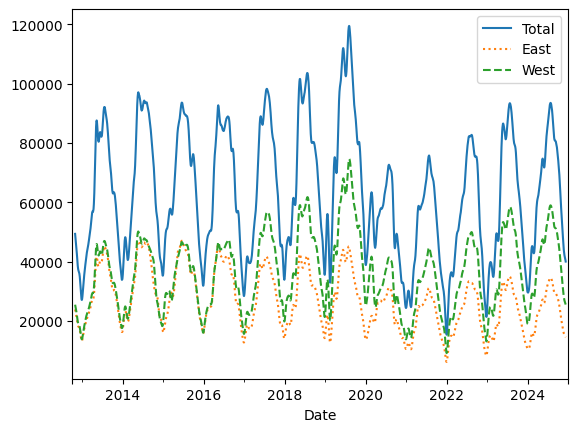

In [10]:
# 使用高斯數取得較平滑的版本
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=['-', ':', '--'])

<Axes: xlabel='time'>

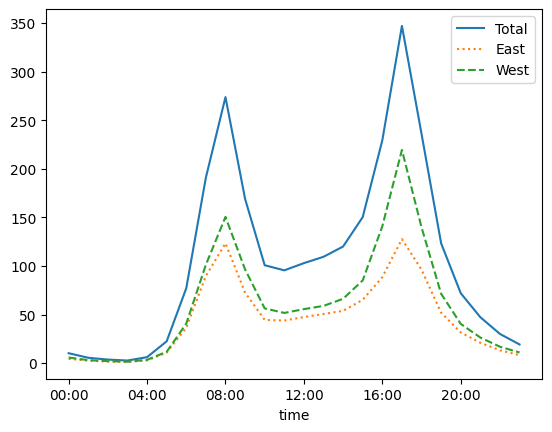

In [15]:
# 計算每小時平均車數
by_time = data.groupby(data.index.time).mean()
hourly_ticks= 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=['-', ':', '--'])

<Axes: >

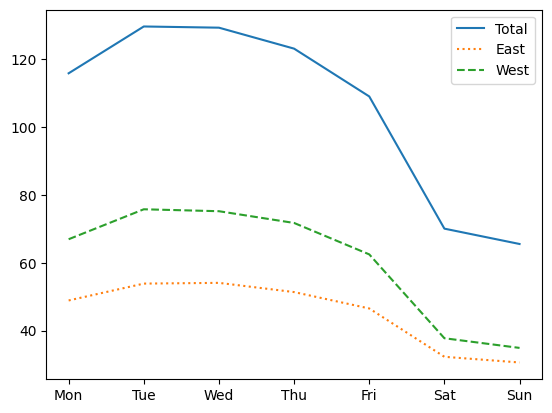

In [19]:
# 研究一周中 每天的變化
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=['-', ':', '--'])


<Axes: title={'center': 'Weekdends'}, xlabel='time'>

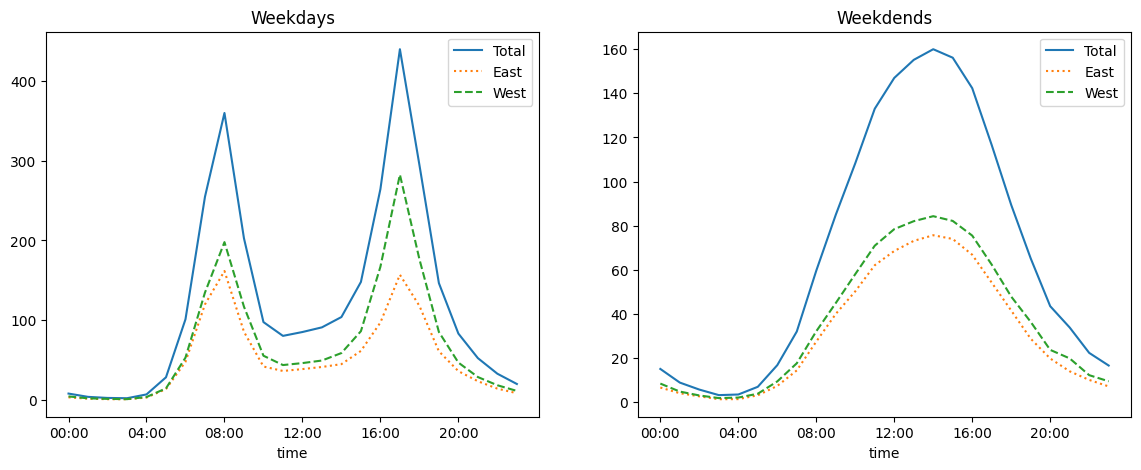

In [20]:
# 比較周末與平日 小時為單位的平均車數
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                            xticks=hourly_ticks, style=['-', ':', '--'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekdends',
                            xticks=hourly_ticks, style=['-', ':', '--'])